# DIGIT-RECOGNIZER

## IMPORTS

In [1]:
# Importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando os dados de treino e teste
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

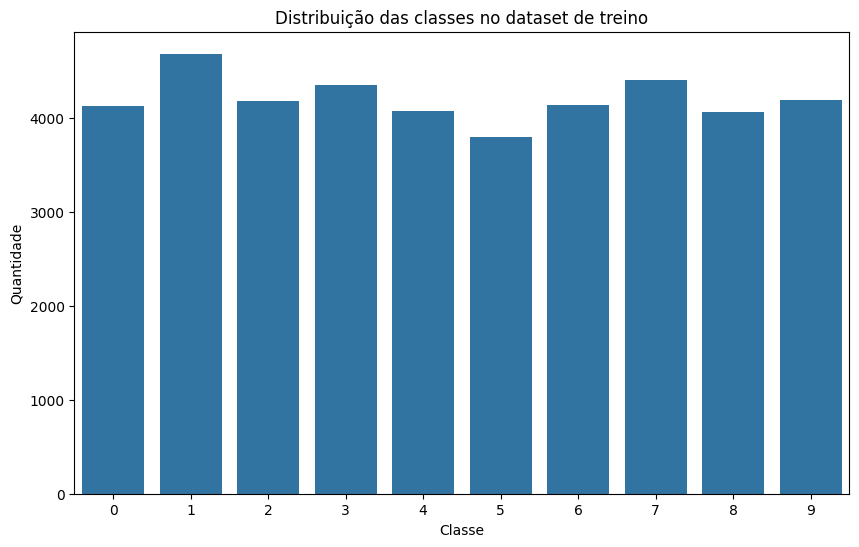

In [3]:
# Visualizando distribuição de classes no dataset de treino
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='label')
plt.title('Distribuição das classes no dataset de treino')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

In [4]:
# Separando os X e Y do conjunto de treino
y = data_train['label']
X = data_train.drop('label', axis=1)
X.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [5]:
# Dividindo o conjunto de treino em treino e testes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalizando os dados para melhorar o desempenho dos algoritmos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [7]:
param_grid = {
    'max_iter': [20, 50, 80, 100],
}

# Criando o modelo GridSearchCV
mlp_model_grid = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)

In [8]:
# Ajustando o modelo aos dados
mlp_model_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_iter': [20, 50, 80, 100]}, verbose=2)

In [9]:
# Obtendo os melhores parâmetros encontrados
best_params = mlp_model_grid.best_params_
print("Melhores Parâmetros:", best_params)

Melhores Parâmetros: {'max_iter': 50}


In [10]:
# Utilizando o Modelo MLPClassifier (rede neural simples)
mlp_model = MLPClassifier(**best_params, hidden_layer_sizes=(100,), random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_val_scaled)

In [11]:
# Avaliando a acurácia do modelo MLP
acc_mlp = accuracy_score(y_val, y_pred_mlp)
print(f"Acurácia da MLP: {acc_mlp}")

Acurácia da MLP: 0.9686904761904762


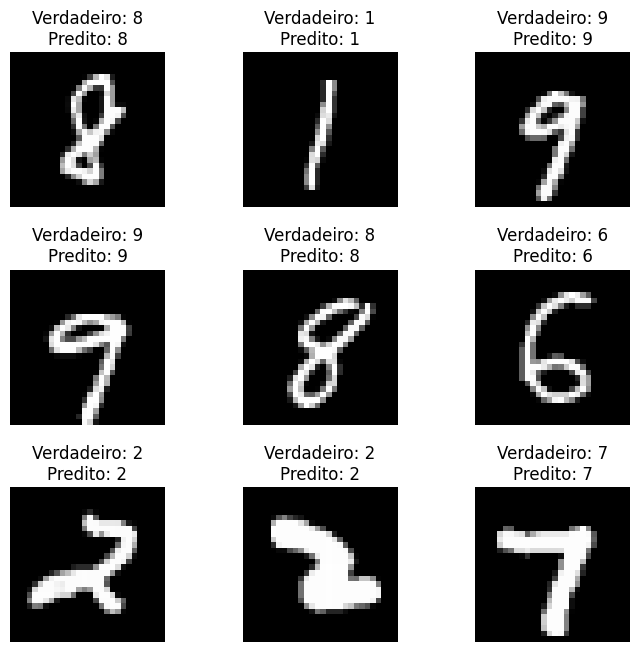

In [12]:
import numpy as np

#Visualizando das previsões das imagens
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_val.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Verdadeiro: {y_val.iloc[i]}\nPredito: {y_pred_mlp[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

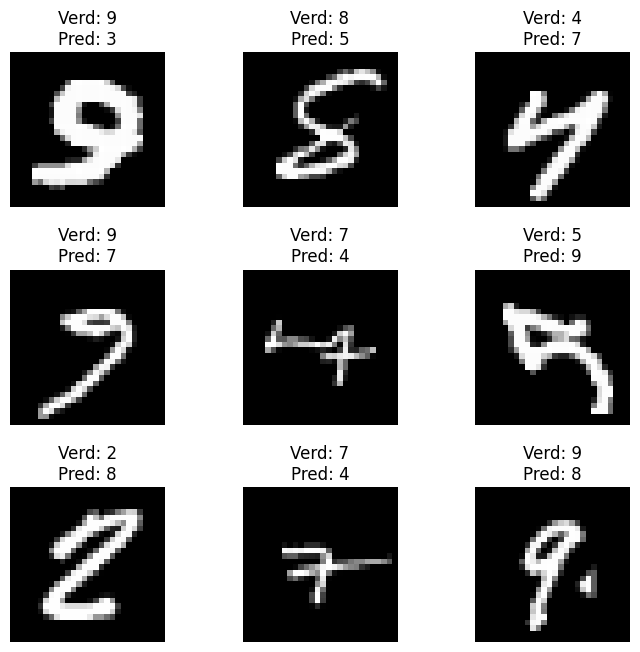

In [13]:
# Visualizando algumas das imagens de teste com previsões incorretas
incorrect_indices = np.where(y_pred_mlp != y_val)[0]

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in np.arange(0, 9):
    if i < len(incorrect_indices):
        idx = incorrect_indices[i]
        axes[i].imshow(X_val.iloc[idx].values.reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Verd: {y_val.iloc[idx]}\nPred: {y_pred_mlp[idx]}')
        axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

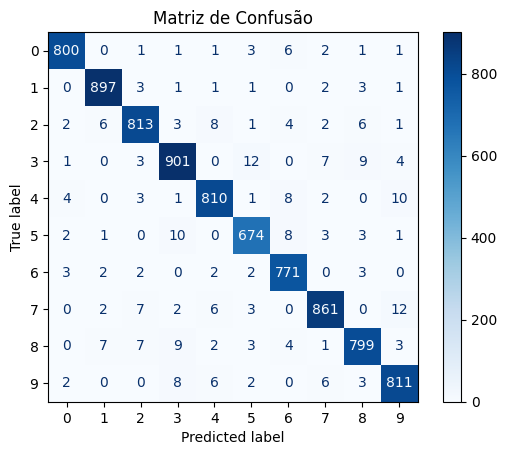

In [14]:
# Visualizando a matriz de confusão
cm = confusion_matrix(y_val, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [15]:
y_pred = mlp_model.predict(data_test)
pd_submit = pd.read_csv('sample_submission.csv')
pd_submit['Label'] = y_pred
pd_submit.to_csv('submission.csv', header=True, index=False)

C:\kaggle-digit-recognizer\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
